# dependencias

In [1]:
import pandas as pd
import os
import sys
ruta_carpeta = os.path.abspath('../src')
if ruta_carpeta not in sys.path:
    sys.path.append(ruta_carpeta)
import scipy.stats as stats
import utilidades as ut
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# lectura de datos 

In [2]:
datos_sem = pd.read_csv('../input/datos_semanales.csv').drop(columns=['Unnamed: 0'])

In [3]:
datos_sem.head()

,group,pro_inter,pro_homic,pro_maxtemp,pro_humid,pro_precip,pro_luna,total_festivos,pro_multas,pro_indexheat
0,1,9.000000,1.142857,32.714286,80.714286,0.0,0.836571,1,3.714286,29.806729
1,2,7.142857,1.571429,31.571429,76.000000,0.0,0.210286,1,5.285714,30.552386
2,3,8.714286,2.142857,32.857143,76.714286,0.0,0.085429,0,5.714286,31.078186
3,4,8.714286,0.428571,33.571429,77.857143,0.0,0.631571,0,5.285714,31.758986
4,5,9.142857,0.857143,32.571429,75.571429,0.0,0.912571,0,5.428571,31.160600


c:\Users\bcriv\OneDrive\Escritorio\semestre 2024-2\series de tiempo\Proyecto Final Python\Series_de_tiempo\src\utilidades.py:25: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  date_range = pd.date_range(start=start_date, periods=len(data), freq=freq)


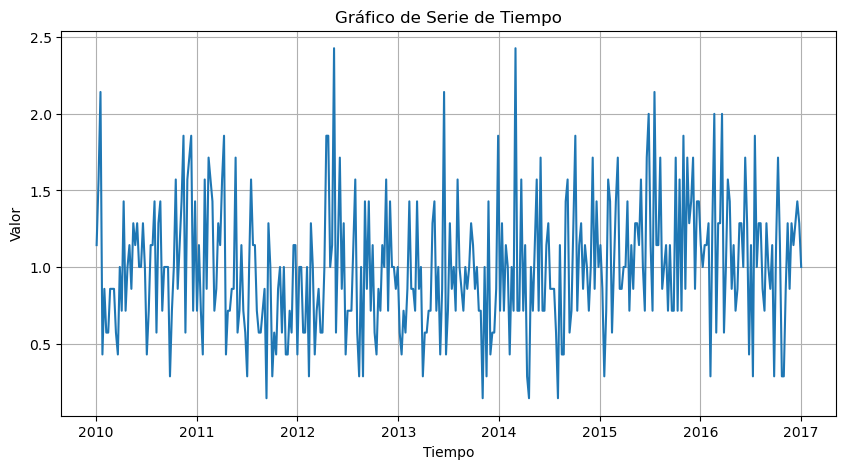

In [4]:
ut.plot_time_series(datos_sem['pro_homic'], 2010, 'w')

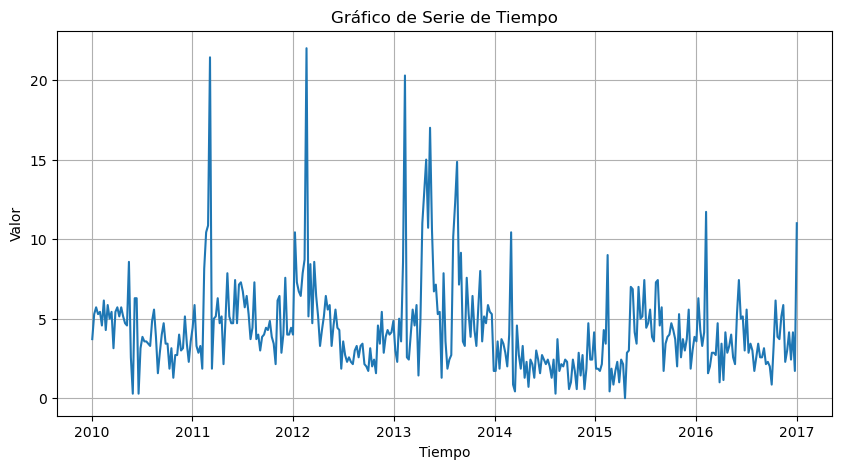

In [5]:
ut.plot_time_series(datos_sem['pro_multas'], 2010, 'w')

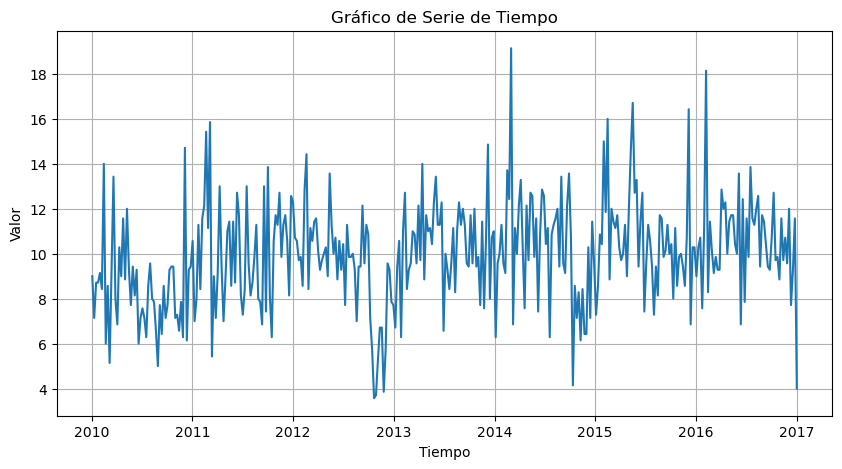

In [6]:
ut.plot_time_series(datos_sem['pro_inter'], 2010, 'w')

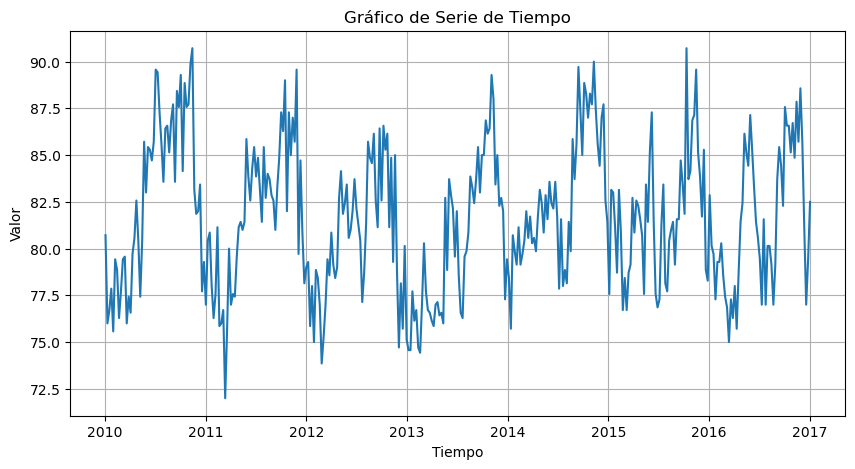

In [7]:
ut.plot_time_series(datos_sem['pro_humid'], 2010, 'w')

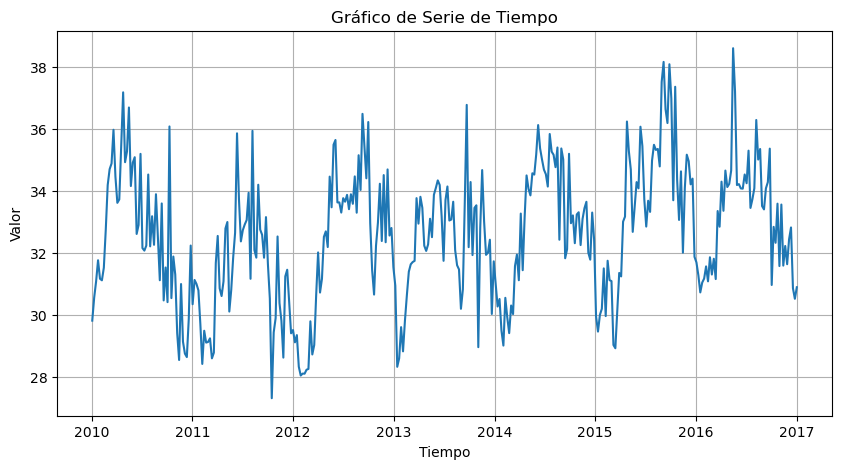

In [8]:
ut.plot_time_series(datos_sem['pro_indexheat'], 2010, 'w')

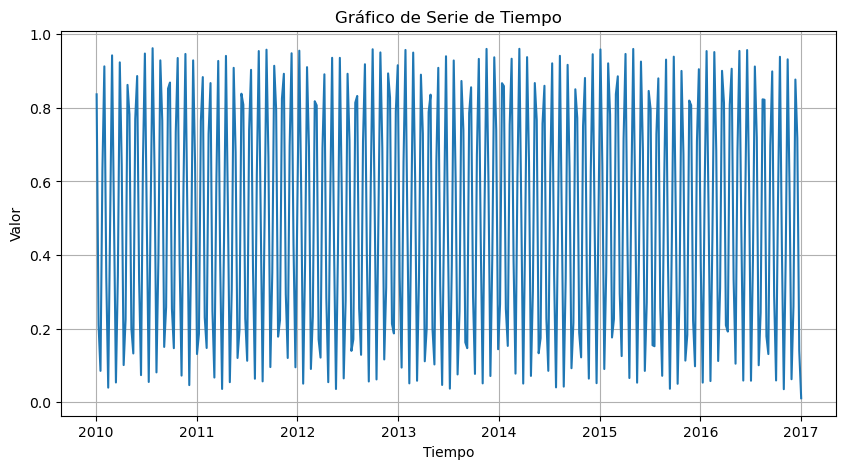

In [9]:
ut.plot_time_series(datos_sem['pro_luna'], 2010, 'w')

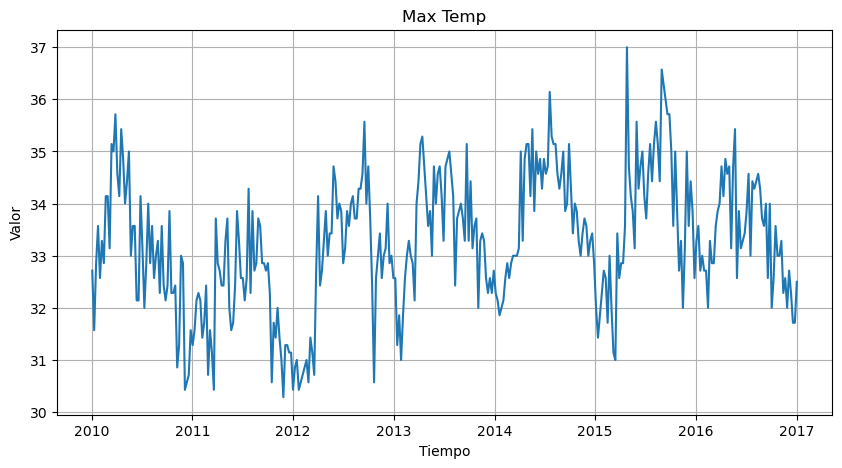

In [10]:
ut.plot_time_series(datos_sem['pro_maxtemp'], 2010, 'w', 'Max Temp')

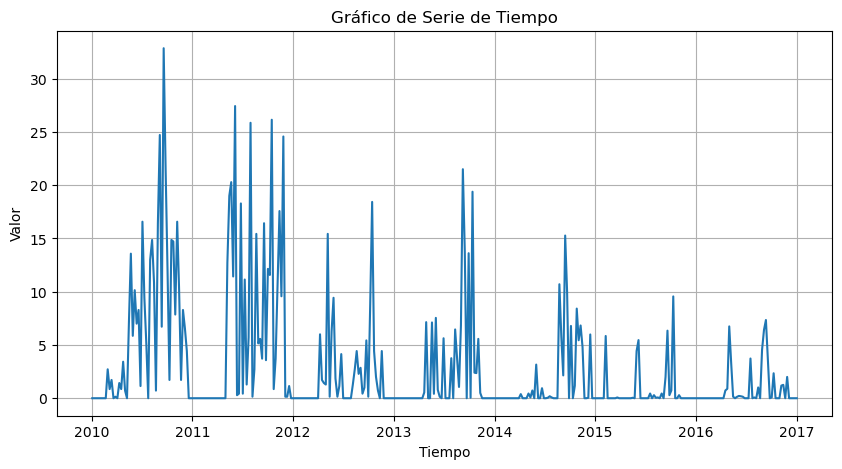

In [11]:
ut.plot_time_series(datos_sem['pro_precip'], 2010, 'w')

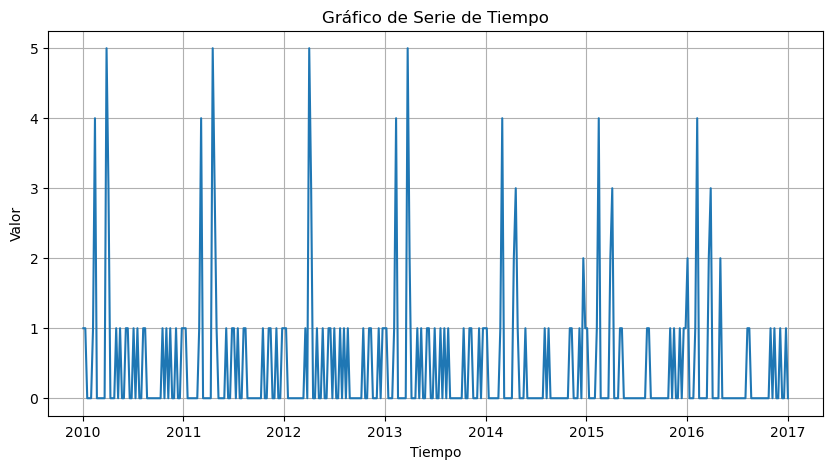

In [12]:
ut.plot_time_series(datos_sem['total_festivos'], 2010, 'w')

# pre-blanqueo de datos
modelos individuales para las variables exogenas

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

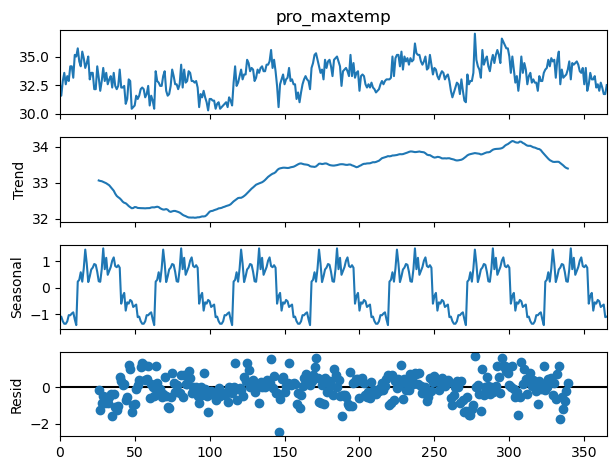

In [26]:
result = seasonal_decompose(datos_sem['pro_maxtemp'], model='additive', period=52)
result.plot()
plt.show()

In [ ]:
result = seasonal_decompose(datos_sem['pro_humid'], model='additive', period=52)
result.plot()
plt.show()

In [14]:
resultado[1]

7.437726669501254e-06

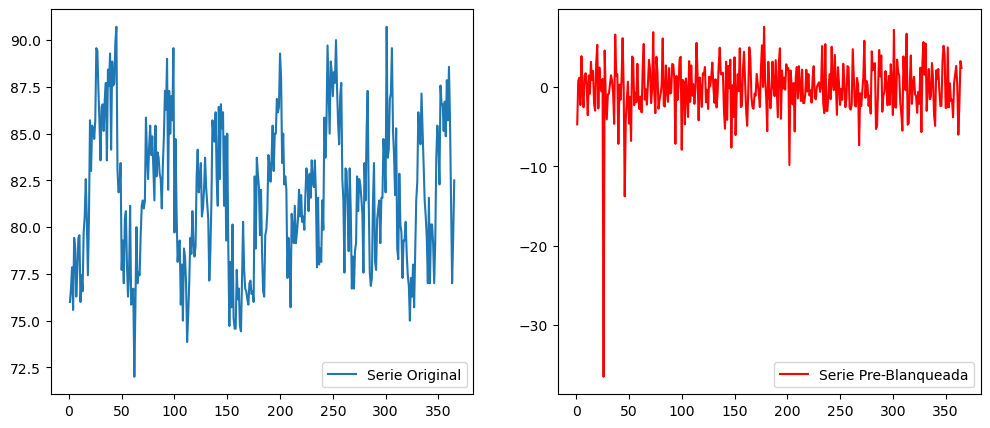

In [15]:
modelo = ARIMA(datos_sem['pro_humid'], order=(1, 1, 0),seasonal_order=(1,1,0,26))  # (p, d, q) con diferenciación
resultado = modelo.fit()

# Obtener los residuos (serie pre-blanqueada)
residuos = resultado.resid

# Graficar la serie original y la pre-blanqueada
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(datos_sem['pro_humid'][1:], label="Serie Original")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(residuos[1:], label="Serie Pre-Blanqueada", color="r")
plt.legend()
plt.show()

la series es estacionaria

# modelamiento

para el modelamiento se van a probar dos metodologias LSTM que es un modelo el cual permite manejar diferentes variables ademas de mirar no tener problemas con con la no linealidad de los datos